## 01 Dataset reading into dataframe
Simple operations to extract data and simple cleaning


In [148]:
import pandas as pd
import numpy as np 

file = "dataset/pokemon_dataset/Pokemon.csv"

In [149]:
df = pd.read_csv(file)
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [150]:
df.shape

(800, 13)

In [151]:
df.index

RangeIndex(start=0, stop=800, step=1)

In [152]:
df["#"].value_counts()

479    6
386    4
710    4
711    4
646    3
      ..
250    1
251    1
252    1
253    1
721    1
Name: #, Length: 721, dtype: int64

In [153]:
df = df.rename(columns={'#': 'Id'})

In [154]:
df.head()

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 02 Data types simple analysis
Goal is to check which data types are presented and separate it into string and numerical columns

In [155]:
df.Id.value_counts()

479    6
386    4
710    4
711    4
646    3
      ..
250    1
251    1
252    1
253    1
721    1
Name: Id, Length: 721, dtype: int64

In [156]:
df.dtypes

Id             int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [157]:
string_columns=df.dtypes.loc[df.dtypes == 'object'].index.to_list()
number_columns=df.dtypes.loc[df.dtypes != 'object'].index.to_list()


In [158]:
df.loc[:, string_columns]

,Name,Type 1,Type 2
0,Bulbasaur,Grass,Poison
1,Ivysaur,Grass,Poison
2,Venusaur,Grass,Poison
3,VenusaurMega Venusaur,Grass,Poison
4,Charmander,Fire,NaN
...,...,...,...
795,Diancie,Rock,Fairy
796,DiancieMega Diancie,Rock,Fairy
797,HoopaHoopa Confined,Psychic,Ghost
798,HoopaHoopa Unbound,Psychic,Dark


In [159]:
df.loc[:, number_columns]

,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,318,45,49,49,65,65,45,1,False
1,2,405,60,62,63,80,80,60,1,False
2,3,525,80,82,83,100,100,80,1,False
3,3,625,80,100,123,122,120,80,1,False
4,4,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,True
796,719,700,50,160,110,160,110,110,6,True
797,720,600,80,110,60,150,130,70,6,True
798,720,680,80,160,60,170,130,80,6,True


## NaN simple analysis

Analysis of nan values,with percentage and counts sorted

In [160]:
nan_counts = df.isna().sum()
nan_counts_sorted = nan_counts.loc[nan_counts>0].sort_values(ascending=False).to_frame(name='total')
nan_counts_sorted["percentage"] = ((nan_counts_sorted.total*100)/df.shape[0])
nan_counts_sorted


,total,percentage
Type 2,386,48.25


## Data Analysis of the selected Pokemon Dataframe without a specific goal

Find oud about the data without any particular goal

In [161]:
df.loc[:, number_columns].describe()

,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Replacing boolean values in missing column legendary to numeric values

In [162]:
df.Legendary = df.Legendary.replace({True: 1, False: 0})

In [163]:
df.loc[:, number_columns].describe()

,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


In [164]:
value_counts_legendary = df['Legendary'].value_counts(normalize=True)
print(value_counts_legendary)

0    0.91875
1    0.08125
Name: Legendary, dtype: float64


### Filter only legendary values

In [165]:
legendary_df = df[df['Legendary']==True]
print(legendary_df.value_counts())

Id   Name                      Type 1    Type 2    Total  HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
144  Articuno                  Ice       Flying    580    90   85      100      95       125      85     1           1            1
145  Zapdos                    Electric  Flying    580    90   90      85       125      90       100    1           1            1
639  Terrakion                 Rock      Fighting  580    91   129     90       72       90       108    5           1            1
640  Virizion                  Grass     Fighting  580    91   90      72       90       129      108    5           1            1
642  ThundurusIncarnate Forme  Electric  Flying    580    79   115     70       125      80       111    5           1            1
     ThundurusTherian Forme    Electric  Flying    580    79   105     70       145      80       101    5           1            1
643  Reshiram                  Dragon    Fire      680    100  120     100      1

In [166]:
df.loc[:, string_columns].describe()

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


## 05 Analysis of particular column
Specific column analysis of Total

In [167]:
#Check for NaN (even if we know already)
df.Total.isna().sum()

0

<AxesSubplot: >

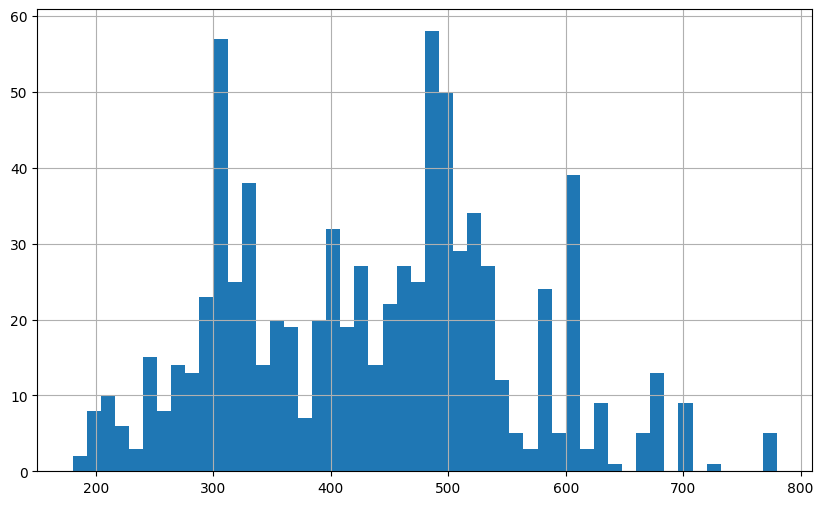

In [168]:
df.Total.hist(bins=50)

### Correlation 

In [169]:
df.corr()['Total'].sort_values()

Generation    0.048384
Id            0.119813
Legendary     0.501758
Speed         0.575943
Defense       0.612787
HP            0.618748
Sp. Def       0.717609
Attack        0.736211
Sp. Atk       0.747250
Total         1.000000
Name: Total, dtype: float64

In [170]:
Strongest_pokemon = df.loc[df.Total.idxmax(),'Name']
Weakest_pokemon = df.loc[df.Total.idxmin(),'Name']
print('Pokemon with highest total:', Strongest_pokemon)
print('Pokemon with lowest total:', Weakest_pokemon)

Pokemon with highest total: MewtwoMega Mewtwo X
Pokemon with lowest total: Sunkern


In [171]:
import matplotlib.pyplot as plt
import matplotlib

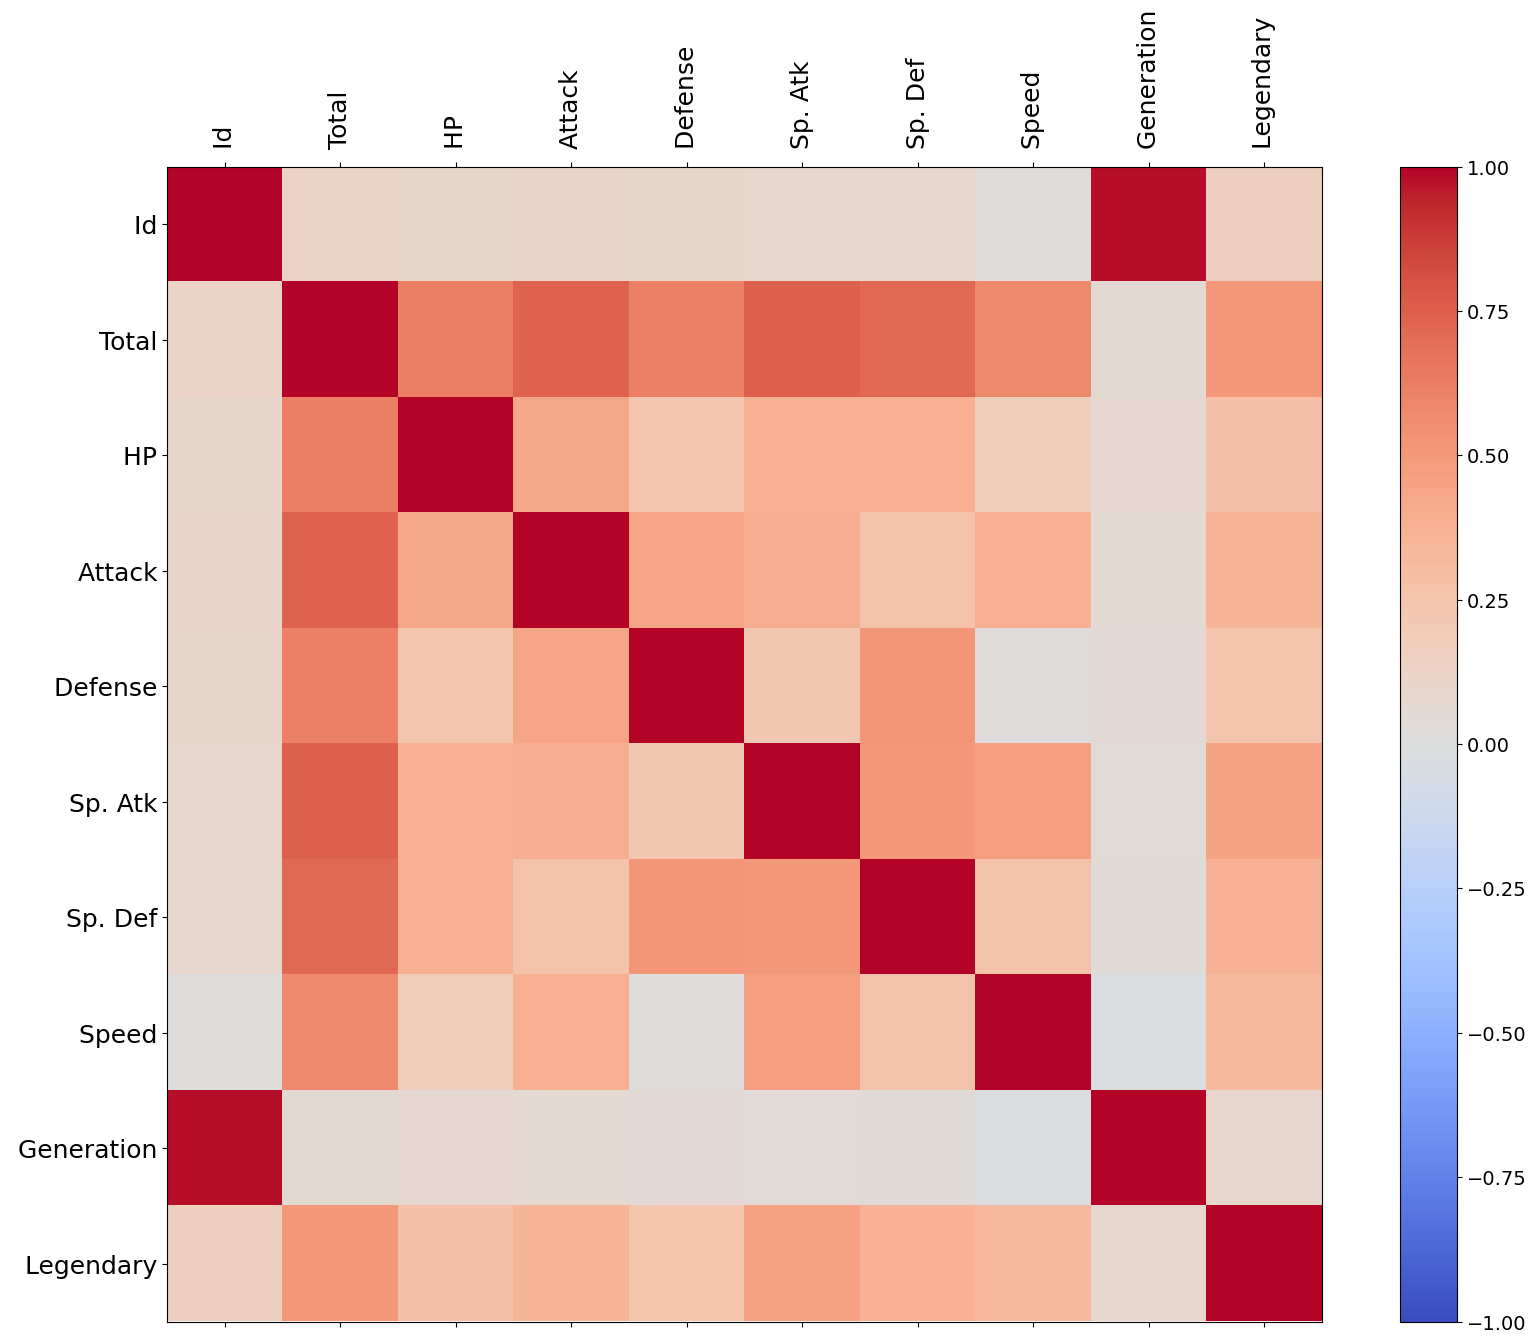

In [172]:
plt.rcParams['figure.figsize'] = 20, 15
dic = {"size": 14}
matplotlib.rc('font', **dic)

# Now we plot correlation of attributes
x = df.loc[:,number_columns]
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

In [173]:
print(string_columns)

['Name', 'Type 1', 'Type 2']


<AxesSubplot: title={'center': 'Total'}, xlabel='Type 1'>

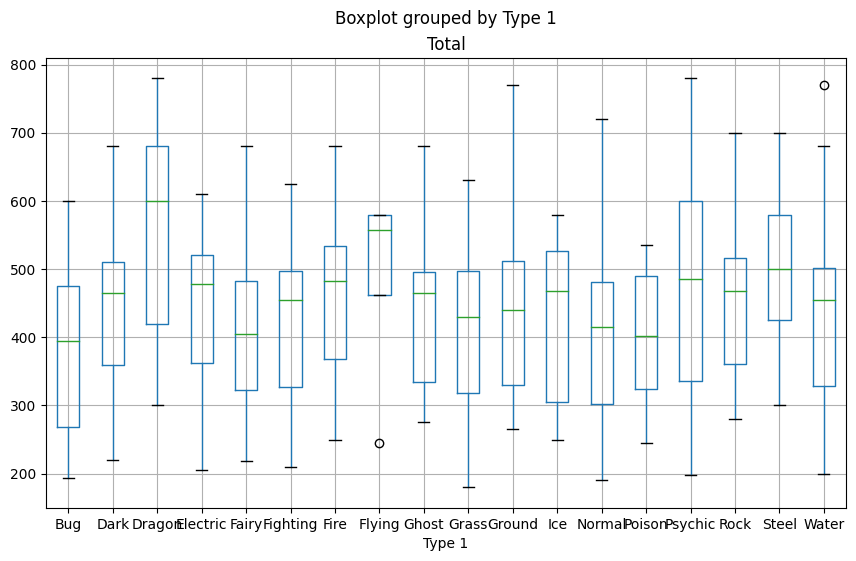

In [174]:
plt.rcParams['figure.figsize'] = 10, 6
dic = {"size": 10}
matplotlib.rc('font', **dic)

df.boxplot(column=["Total"], by="Type 1")

<AxesSubplot: title={'center': 'Total'}, xlabel='Type 2'>

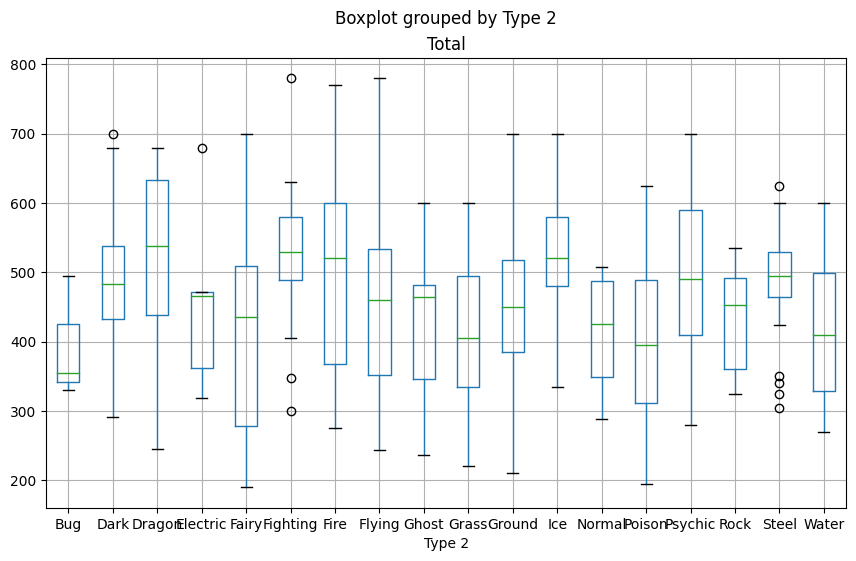

In [175]:
plt.rcParams['figure.figsize'] = 10, 6
dic = {"size": 10}
matplotlib.rc('font', **dic)

df.boxplot(column=["Total"], by="Type 2")

In [176]:
number_columns

['Id',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [177]:
df.loc[df.Total.notna() ,["Attack", "Sp. Atk", "Sp. Def", "Defense", "Speed", "HP", "Total"]]

,Attack,Sp. Atk,Sp. Def,Defense,Speed,HP,Total
0,49,65,65,49,45,45,318
1,62,80,80,63,60,60,405
2,82,100,100,83,80,80,525
3,100,122,120,123,80,80,625
4,52,60,50,43,65,39,309
...,...,...,...,...,...,...,...
795,100,100,150,150,50,50,600
796,160,160,110,110,110,50,700
797,110,150,130,60,70,80,600
798,160,170,130,60,80,80,680


In [178]:
df.head()

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


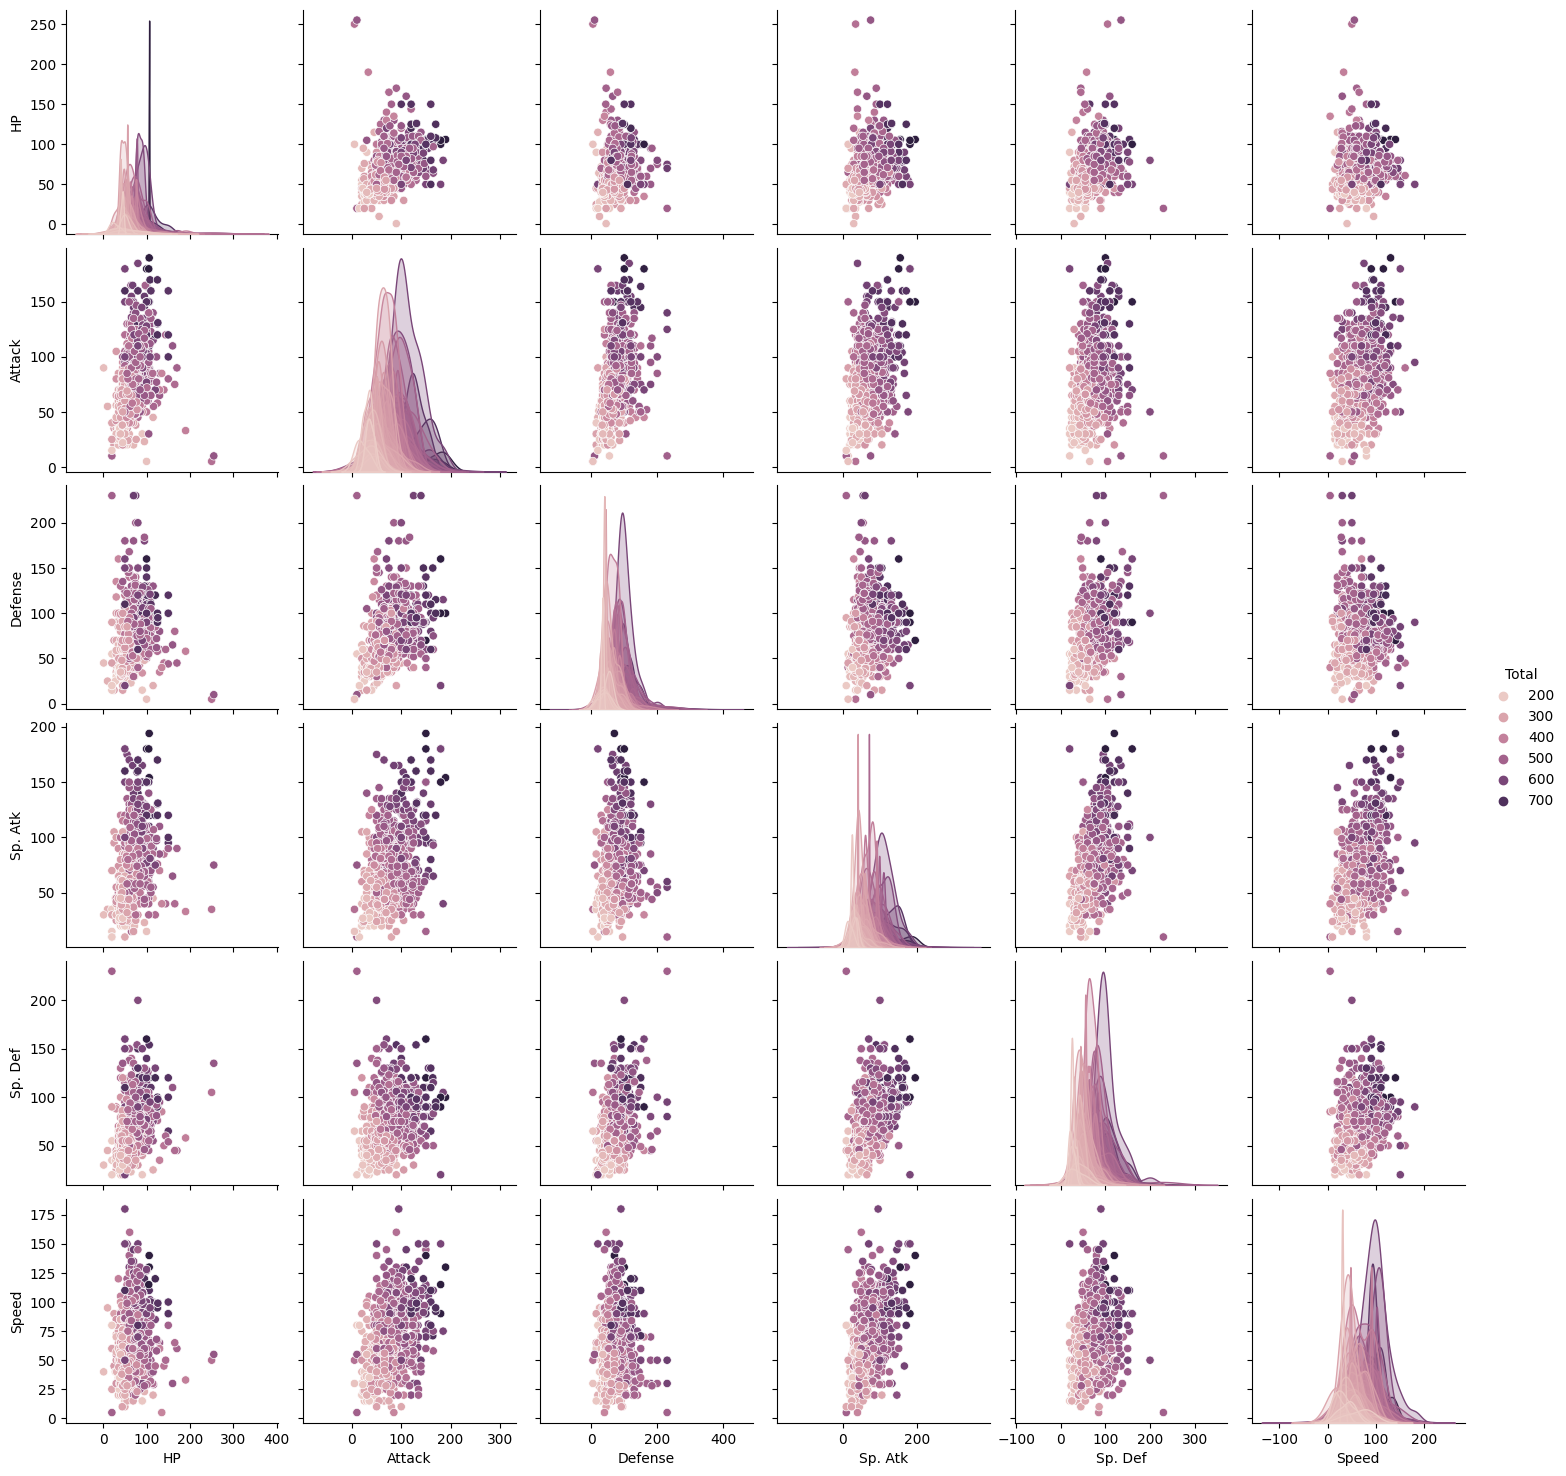

In [179]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from scipy.stats import linregress

select_number_columns = [ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']

df_numeric = df.loc[df.Total.notna() , select_number_columns]
sns.pairplot(df_numeric, hue='Total')


### Trend analysis

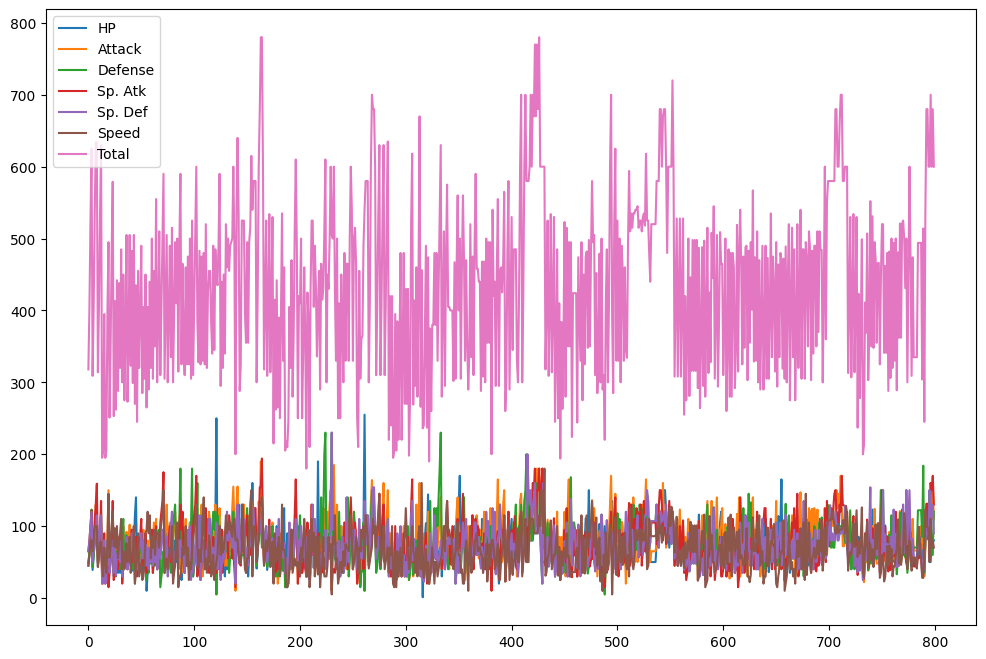

In [182]:
fig, ax = plt.subplots(figsize=(12, 8))
for column in df_numeric.columns:
    ax.plot(df_numeric[column], label=column)
ax.legend()
plt.show()

In [184]:
total=df.Total

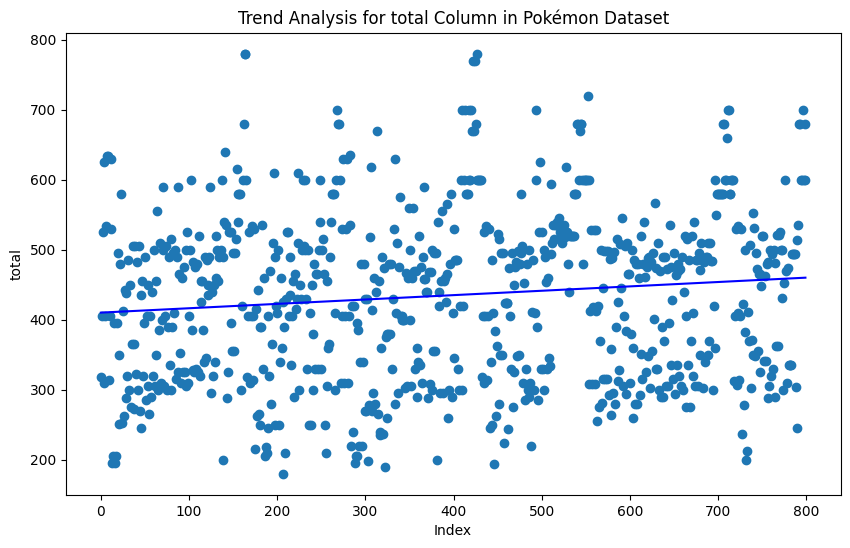

In [185]:
plt.scatter(x=total.index, y=total)
slope, intercept, rvalue, pvalue, stderr = linregress(x=total.index, y=total)
line = slope*total.index + intercept
plt.plot(total.index, line, color="blue")
plt.xlabel("Index")
plt.ylabel("total")
plt.title('Trend Analysis for total Column in Pokémon Dataset')
plt.show()